In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.ert as ert
from pygimli.viewer.mpl import drawStreams
from pygimli.physics import ert

In [31]:
def plotABMN(ax, scheme, idx):
    """ Visualize four-point configuration on given axes. """
    def getABMN(scheme, idx):
        """ Get coordinates of four-point cfg with id `idx` from DataContainerERT
        `scheme`."""
        coords = {}
        for elec in "abmn":
            elec_id = int(scheme(elec)[idx])
            elec_pos = scheme.sensorPosition(elec_id)
            coords[elec] = elec_pos.x(), elec_pos.y()
        return coords

    coords = getABMN(scheme, idx)
    for elec in coords:
        x, y = coords[elec]
        if elec in "ab":
            color = "green"
        else:
            color = "magenta"
        ax.plot(x, y, marker=".", color=color, ms=10)
        ax.annotate(
            elec.upper(), xy=(x, y), size=12, ha="center", #fontsize=10,
            bbox=dict(boxstyle="round", fc=(0.8, 0.8, 0.8), ec=color),
            xytext=(0, 20), textcoords='offset points',
            arrowprops=dict(
                arrowstyle="wedge, tail_width=.5",
                fc=color,
                ec=color,
                patchA=None,
                alpha=0.75
            )
        )
        ax.plot(coords["a"][0],)

09/07/23 - 10:33:45 - pyGIMLi - INFO - Cache /home/paolo/Dev/ert-notes/.venv/lib/python3.11/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 2): /home/paolo/.cache/pygimli/1373405483707845468


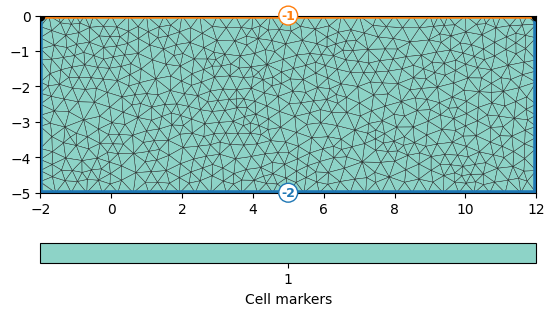

In [32]:
# create data scheme
shm = ert.createData(elecs=11, schemeName='wa')
shm['k'] = ert.createGeometricFactors(shm)

# create world and mesh
world = mt.createWorld(start=[-2, 0], end=[12, -5], worldMarker=True, marker=1)
for pos in shm.sensorPositions():
    world.createNode(pos)

mesh = mt.createMesh(world, area=.1, quality=33, smooth=[1, 10])
pg.show(mesh, markers=True, showMesh=True);

In [33]:
# make a simulation
pot = ert.simulate(mesh=mesh, scheme=shm, res=[[1, 100]], returnFields=1)

ModellingBase::setMesh() copying new mesh ... Found datafile: 11 electrodes
Found: 11 free-electrodes
rMin = 0.5, rMax = 20
NGauLeg + NGauLag for inverse Fouriertransformation: 9 + 4
Found non-Neumann domain
0.0224559 s
FOP updating mesh dependencies ... 4.797e-06 s
Calculating response for model: min = 100 max = 100
Allocating memory for primary potential...... 6.0405e-05

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.143445s
Response: min = 99.866 max = 100.009 mean = 99.9797
Reciprocity rms(modelReciprocity) 0%, max: 0%


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f29a6b44390>)

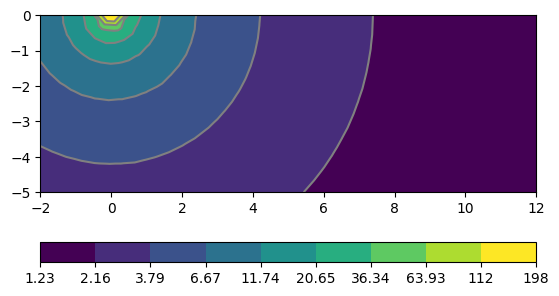

In [34]:
pg.show(mesh, pot[0], logScale=True, nLevs=10)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f29a6c13d50>)

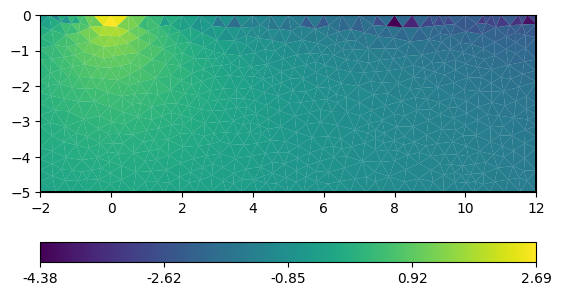

In [35]:
E = -pg.solver.grad(mesh, pot[0])
pg.show(mesh, np.log10(np.abs(E[:, 1])))# pg.core.math.symlog(E[:, 1], 0.1))#, cMin=-1e-4, cMax=1e-4, cMap="bwr")

### Flujo de corriente en un subsuelo uniforme

¿Cómo fluye la corriente en un caso ideal?

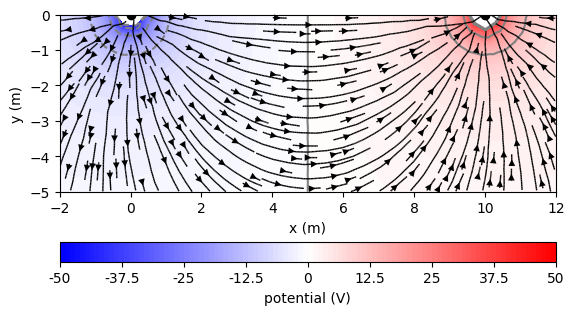

In [36]:
du = pot[10] - pot[0]
cmax = 50
ax, cb = pg.show(mesh, du, cMap="bwr", cMin=-cmax, cMax=cmax, nCols=100,
                 nLevs=9, label="potential (V)")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.plot([0, 10], [0, 0], "ko");
drawStreams(ax, mesh, du, color='Black');

#### Flujo de corriente en una layered subsurface

El flujo de corriente es afectado por el cambio de resitividad

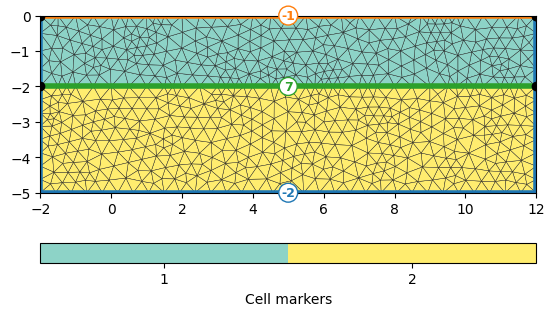

In [37]:
layers = mt.createWorld(start=[-2, 0], end=[12, -5], layers=[-2], worldMarker=True)
for pos in shm.sensorPositions():
    layers.createNode(pos)

mesh = mt.createMesh(layers, area=.1, quality=33, smooth=[1, 10])
pg.show(mesh, markers=True, showMesh=True);

09/07/23 - 10:33:53 - pyGIMLi - ERROR - None._drawField(showmesh.py:385)
Data size invalid


Data:  652 -196.2697871942842 185.65241243317453 False
Mesh:  Mesh: Nodes: 696 Cells: 1301 Boundaries: 1996
cannot access local variable 'gci' where it is not associated with a value
Traceback (most recent call last):
  File "/home/paolo/Dev/ert-notes/.venv/lib/python3.11/site-packages/pygimli/viewer/showmesh.py", line 413, in showMesh
    gci, validData = _drawField(ax, mesh, data, kwargs)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/paolo/Dev/ert-notes/.venv/lib/python3.11/site-packages/pygimli/viewer/showmesh.py", line 392, in _drawField
    return gci, validData
           ^^^
UnboundLocalError: cannot access local variable 'gci' where it is not associated with a value
652 None


Exception: Data length (652) for streamline is neighter nodeCount (696) nor cellCount (696)

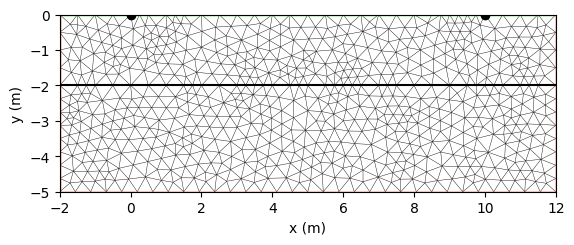

In [38]:
du = pot[10] - pot[0]
cmax = 50
ax, cb = pg.show(
    mesh,
    du,
    cMap="bwr",
    cMin=-cmax,
    cMax=cmax,
    nCols=100,
    nLevs=9,
    label="potential (V)"
)

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.plot([0, 10], [0, 0], "ko");

drawStreams(ax, mesh, du, color='Black');

#### ¿Cómo fluye a través de cuerpos?

El flujo de corriente es afectado por el cambio de resitividad

In [ ]:
pot2 = ert.simulate(mesh=mesh2, scheme=shm, res=resmap,
                    returnFields=1)

ModellingBase::setMesh() copying new mesh ... Found datafile: 11 electrodes
Found: 11 free-electrodes
rMin = 0.5, rMax = 20
NGauLeg + NGauLag for inverse Fouriertransformation: 9 + 4
Found non-Neumann domain
0.0538646 s
FOP updating mesh dependencies ... 4.695e-06 s
Calculating response for model: min = 10 max = 1000
Allocating memory for primary potential...... 0.00349368

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.22195s
Response: min = 26.5618 max = 111.579 mean = 75.0117
Reciprocity rms(modelReciprocity) 0.962962%, max: 3.02274%


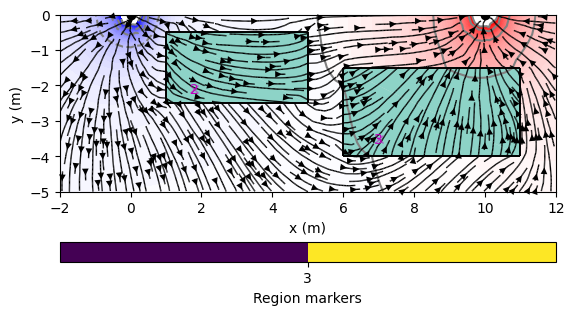

In [ ]:
u2 = pot2[10] - pot2[0]
ax, cb = pg.show(mesh2, u2, cMap="bwr", cMin=-cmax, cMax=cmax, nCols=100,
                 nLevs=9, label="potential (V)")
# pg.show(rect, ax=ax, markers=False, colorBar=False)
# %%
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.plot([0, 10], [0, 0], "ko")
drawStreams(ax, mesh2, u2, color='Black');
pg.show(rect, ax=ax);
pg.show(rect2, ax=ax);

ModellingBase::setMesh() copying new mesh ... Found datafile: 11 electrodes
Found: 11 free-electrodes
rMin = 0.5, rMax = 20
NGauLeg + NGauLag for inverse Fouriertransformation: 9 + 4
Found non-Neumann domain
0.0156299 s
FOP updating mesh dependencies ... 4.166e-06 s
Calculating response for model: min = 10 max = 1000
Allocating memory for primary potential...... 0.000120538

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.159177s
Response: min = 26.5618 max = 111.579 mean = 75.0117
Reciprocity rms(modelReciprocity) 0.962962%, max: 3.02274%


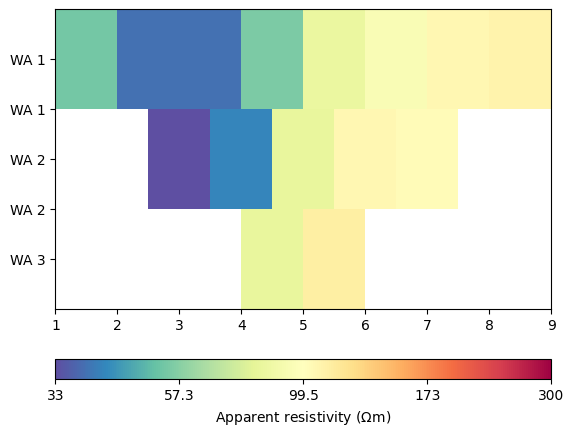

In [ ]:
data = ert.simulate(mesh=mesh2, scheme=shm, res=resmap)
ax, _ = pg.show(data, cMin=33, cMax=300);

In [ ]:
fop = ert.ERTModelling()
fop.setData(shm)
fop.setMesh(mesh)
model = np.ones(mesh.cellCount())
fop.createJacobian(model)

09/07/23 - 09:08:15 - pyGIMLi - INFO - Found 2 regions.
09/07/23 - 09:08:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
09/07/23 - 09:08:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
09/07/23 - 09:08:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


09/07/23 - 09:08:16 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2692 Cells: 5204 Boundaries: 3992


In [ ]:
# for i in range(data.size()):
i = 10
sens = fop.jacobian()[i]
normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 1e-2)
normsens /= np.max(normsens)
ax, _ = pg.show(mesh, normsens, cMap="bwr",
                label="sensitivity", nLevs=3, cMin=-1, cMax=1)
plotABMN(ax, shm, i);

RuntimeError: ./core/src/vector.h:689		GIMLI::Vector<ValueType>& GIMLI::Vector<ValueType>::operator/=(const GIMLI::Vector<ValueType>&) [with ValueType = double]  763 != 1301

14/10/22 - 07:35:42 - pyGIMLi - INFO - Found 2 regions.
14/10/22 - 07:35:42 - pyGIMLi - INFO - Region with smallest marker (1) set to background
14/10/22 - 07:35:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/10/22 - 07:35:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
14/10/22 - 07:35:42 - pyGIMLi - INFO - Use median(data values)=81.83102491526887
14/10/22 - 07:35:42 - pyGIMLi - INFO - Created startmodel from forward operator: 171 [81.83102491526887,...,81.83102491526887]


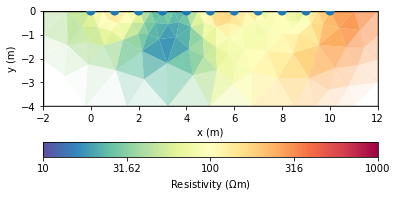

In [ ]:
data["err"] = pg.Vector(data.size(), 0.01)
mgr = ert.Manager(data)
mgr.invert()
ax, _ = mgr.showResult(cMin=10, cMax=1000, xlabel="x (m)", ylabel="y (m)",);